UCF 동영상 데이터 셋
- https://www.crcv.ucf.edu/data/UCF_YouTube_Action.php

In [24]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [25]:
# ucf11 mpg 파일의 개수
print(len(glob('D:/data_ai/5_AI/UCF11_updated_mpg/*/*/*.mpg')))

1600


In [26]:
file_paths = glob('D:/data_ai/5_AI/UCF11_updated_mpg/*/*/*.mpg')

In [27]:
print(file_paths[0])

D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v_shooting_01\v_shooting_01_01.mpg


In [28]:
# cv2.VideoCapture 동영상
cap = cv2.VideoCapture(file_paths[0])

frames = []

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame = cv2.resize(frame, (256, 256))
    frame = frame[:, :, [2, 1, 0]]    # [2, 1, 0] : 색상 변환(BGR -> RGB)
    frames.append(frame)
    
cap.release()

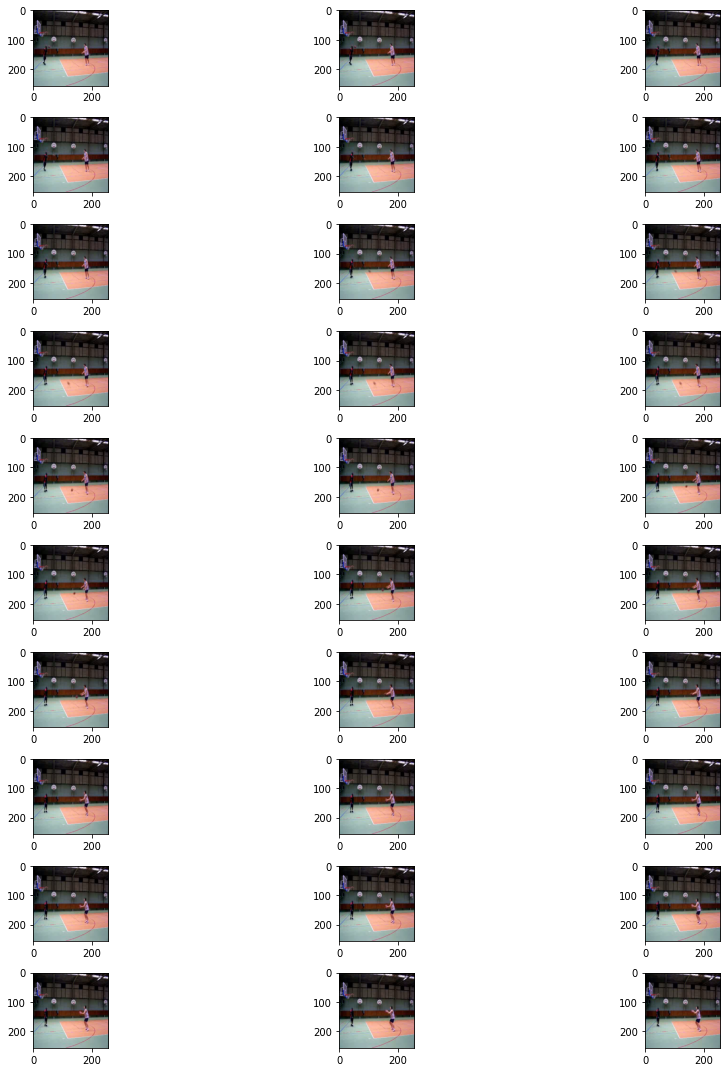

In [29]:
arr = np.array(frames)
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(10, 3, 1+3*i)
    plt.imshow(arr[1+3*i])
    plt.subplot(10, 3, 2+3*i)
    plt.imshow(arr[2+3*i])
    plt.subplot(10, 3, 3+3*i)
    plt.imshow(arr[3+3*i])
plt.tight_layout()

In [30]:
len(frames) / 29.97    # 영상시간 : 프레임개수 / fps

3.6036036036036037

In [31]:
df = pd.DataFrame(columns=['file_path', 'frames', 'duration', 'label'])

for file_path in file_paths:
    label = file_path.split('\\')[1]
    cap = cv2.VideoCapture(file_path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frames / 29.97
    elem = {
        'file_path':file_path,
        'frames':frames,
        'duration':duration,
        'label':label
    }
    df.loc[len(df)] = elem
    cap.release()

In [32]:
df

file_path frames  duration  \
0     D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...    107  3.570237   
1     D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...    139  4.637971   
2     D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...    148  4.938272   
3     D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...    100  3.336670   
4     D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...    140  4.671338   
...                                                 ...    ...       ...   
1595  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...    239  7.974641   
1596  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...    239  7.974641   
1597  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...    239  7.974641   
1598  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...    239  7.974641   
1599  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...    205  6.840174   

           label  
0     basketball  
1     basketball  
2     basketball  
3     basketball  
4     basketball  
...          ...  
1595     walking  
1596     walking  
1597     walking  
1598     walking  
1599     walking  

[1600 rows x 4 columns]

In [23]:
# label 별 group을 맺어 각 그룹의 영상의 길이를 출력
# label, sum(영상 길이)
# basketball 639.139139 / 데이터가 잘못 되었는지... 739.305973

df_duration_sum_label = df.groupby('label').duration.sum().rename('sum')
df_duration_sum_label

label
basketball             739.305973
biking                1094.060727
diving                 891.157824
golf_swing             786.586587
horse_riding          1296.429763
soccer_juggling       1522.655989
swing                  921.588255
tennis_swing           883.416750
trampoline_jumping     799.799800
volleyball_spiking     428.128128
walking                921.121121
Name: sum, dtype: float64

In [34]:
# label, average(평균 영상 길이)
# basketball 4.532902
df_duration_avg_label = df.groupby('label').duration.mean().rename('Average')
df_duration_avg_label

label
basketball            5.243305
biking                7.545246
diving                5.712550
golf_swing            5.539342
horse_riding          6.547625
soccer_juggling       9.760615
swing                 6.726922
tennis_swing          5.289921
trampoline_jumping    6.721007
volleyball_spiking    3.690760
walking               7.488790
Name: Average, dtype: float64

<AxesSubplot:xlabel='label'>

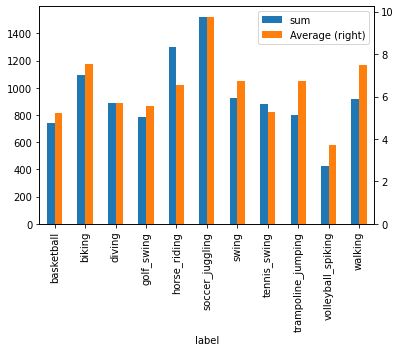

In [36]:
df_video_states = pd.concat([df_duration_sum_label, df_duration_avg_label], axis=1)
df_video_states.plot.bar(secondary_y='Average')

In [40]:
label_dirs = glob('D:/data_ai/5_AI/UCF11_updated_mpg/*')
label_dirs

['D:/data_ai/5_AI/UCF11_updated_mpg\\basketball',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\biking',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\diving',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\golf_swing',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\horse_riding',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\soccer_juggling',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\swing',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\tennis_swing',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\trampoline_jumping',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\volleyball_spiking',
 'D:/data_ai/5_AI/UCF11_updated_mpg\\walking']

In [41]:
# 11개의 클래스
# 클래스당 25개의 영상 그룹
# 0 ~ 19 : 학습 그룹
# 20 ~ 24 : 테스트 그룹
import random

train_df = pd.DataFrame(
    columns=['file_path', 'label']
)

valid_df = pd.DataFrame(
    columns = ['file_path', 'label']
)
label_dirs = glob('D:/data_ai/5_AI/UCF11_updated_mpg/*')
for label_dir in label_dirs:
    file_dirs = glob(label_dir + '\\v_*')
    random.shuffle(file_dirs)
    
    for i in range(20):
        train_dir = file_dirs[i]
        label = train_dir.split('\\')[-1].split('_')[1]
        file_path = random.choice(glob(train_dir + "\\*"))
        train_df.loc[len(train_df)] = [file_path, label]
        
    for i in range(20, 25):
        valid_dir = file_dirs[i]
        label = valid_dir.split('\\')[-1].split('_')[1]
        file_path = random.choice(glob(valid_dir + "\\*"))
        valid_df.loc[len(valid_df)] = [file_path, label]
        
    

In [42]:
print(len(train_df))
print(len(valid_df))

220
55


In [43]:
train_df

file_path     label
0    D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...  shooting
1    D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...  shooting
2    D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...  shooting
3    D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...  shooting
4    D:/data_ai/5_AI/UCF11_updated_mpg\basketball\v...  shooting
..                                                 ...       ...
215  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...      walk
216  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...      walk
217  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...      walk
218  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...      walk
219  D:/data_ai/5_AI/UCF11_updated_mpg\walking\v_wa...      walk

[220 rows x 2 columns]

In [44]:
# 두번 실행하면 동일한 파일이 있어서 에러남

import os

os.mkdir('D:/data_ai/5_AI/UCF11_updated_png')
os.mkdir('D:/data_ai/5_AI/UCF11_updated_png/train')
os.mkdir('D:/data_ai/5_AI/UCF11_updated_png/valid')

In [48]:
train_df.to_csv('D:/data_ai/5_AI/ucf11_train_vid.csv', index=False)
valid_df.to_csv('D:/data_ai/5_AI/ucf11_valid_vid.csv', index=False)

In [53]:
max_frame = 10
SAVE_DIR = 'D:/data_ai/5_AI/UCF11_updated_png/'

for i, elem in train_df.iterrows():
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:    # return값이 없을 때
            break
            
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
            
    label = elem['label']
    for j, frame in enumerate(frames):
        file_name = f'train/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name, frame)
        
    cap.release()

In [54]:
print(len(glob(SAVE_DIR + 'train/*')))

2200


In [55]:
max_frame = 10
SAVE_DIR = 'D:/data_ai/5_AI/UCF11_updated_png/'

for i, elem in valid_df.iterrows():
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:    # return값이 없을 때
            break
            
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
            
    label = elem['label']
    for j, frame in enumerate(frames):
        file_name = f'valid/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name, frame)
        
    cap.release()

In [56]:
print(len(glob(SAVE_DIR + 'valid/*')))

550
